<a href="https://colab.research.google.com/github/pepetellez/BEDU-Data-Analysis/blob/main/Analisis-de-Datos-con-Python/6_Visualizacion_de_Datos_Avanzada/s6_r4_graficas_de_barras_apiladas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 4: Gráficas de Barras Apiladas

### 1. Objetivos:
    - Aprender a generar e interpretar gráficas de barras apiladas
 
---
    
### 2. Desarrollo:

### a) Uso de tierra de propiedades en venta en Melbourne, Australia

Ya usamos un treemap para visualizar el uso de tierra de propiedades en venta en Melbourne, Australia. Vamos a realizar el mismo análisis pero ahora utilizando gráficas de barras apiladas, para ver qué diferencias y similitudes tienen. Queremos visualizar lo mismo que en el Reto 1: después de segmentar nuestros datos por regiones y por tipos de propiedad, ¿cómo se compara el uso de tierra de cada uno con los demás?

El Reto consiste en dos partes. La primera parte es la siguiente:

1. Lee el dataset 'melbourne_housing-clean.csv'.
2. Realiza una gráfica de barras convencional donde el eje `x` sea el nombre de la región ('region_name') y el eje `y` sea la suma total del 'land_size' de todas las propiedades que se encuentran en esa región. Asegúrate de que las barras estén ordenadas de mayor a menor.
3. Asegúrate de que el título y los nombres de ejes sean adecuados. Además elige una paleta de colores agradable para las barras. Ten cuidado con los nombres de los tics en el eje `x`: si quedan muy apretados, tendrás que girarlos para que sean legibles.

La segunda parte del Reto es la siguiente:

1. Vamos ahora a realizar una segunda agrupación. Además de agrupar tus datos por región, también agrúpalos por tipo de propiedad.
2. Realiza una gráfica de barras apilada con las siguientes características:

  a) El eje `x` son los nombres de las regiones
  b) El eje `y` es el total de 'land_size' de todas las propiedades contenidas en cada región
  c) Cada barra estará dividida en 3 partes (cuando aplique), una parte por cada tipo de propiedad
  
Lo que estamos obteniendo entonces es la misma gráfica de barras de la primera parte, pero con cada barra segmentada por tipo de propiedad. De esta manera es fácil ver la contribución que tiene cada tipo de propiedad al total de 'land_size' en cada región.
3. Asegúrate como siempre de que la gráfica sea agradable y comprensible.

Comenta tus hallazgos con tus compañeros y la experta. Específicamente discutan las preguntas siguientes: ¿Cómo se compara esta visualización con el treemap que realizamos en el Reto 1? ¿Cuál te parece más clara de las dos? ¿Hay información en cada una de las gráficas que no es posible extraer de la otra? ¿En qué contexto utilizarías tú cada una de ellas?

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/melbourne_housing-clean.csv')

df.head()

,Unnamed: 0,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [31]:
df_grouped = df.groupby('Unnamed: 0')[['type', 'region_name']].max()
df_grouped

,type,region_name
Unnamed: 0,,
0,h,Northern Metropolitan
1,h,Northern Metropolitan
2,h,Northern Metropolitan
3,h,Northern Metropolitan
4,h,Northern Metropolitan
...,...,...
11641,h,Northern Victoria
11642,h,Western Metropolitan
11643,h,Western Metropolitan


In [34]:
value_counts_all = df_grouped['region_name'].value_counts()

value_counts_all

Southern Metropolitan         4224
Northern Metropolitan         3418
Western Metropolitan          2528
Eastern Metropolitan          1124
South-Eastern Metropolitan     272
Eastern Victoria                36
Western Victoria                22
Northern Victoria               22
Name: region_name, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


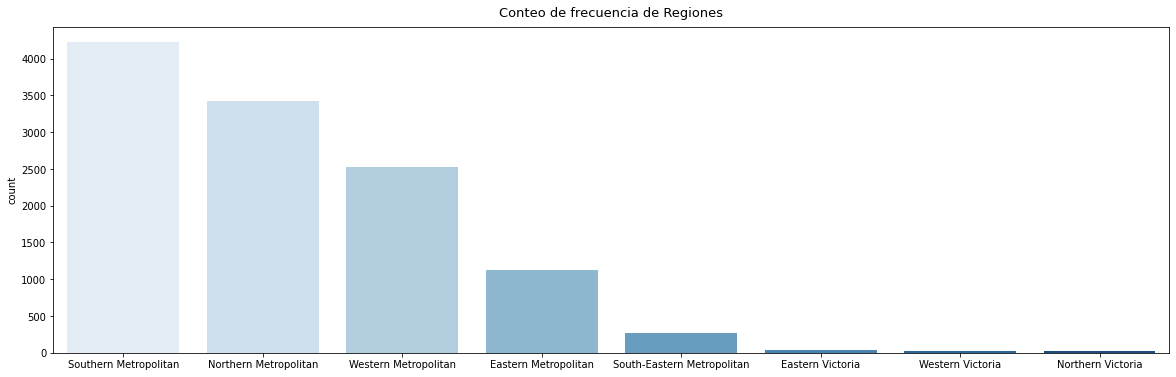

In [35]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot()

sns.barplot(value_counts_all.index, value_counts_all, ax=ax, palette='Blues');

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia de Regiones', fontsize=13, pad=10);

In [40]:
df_grouped['count'] = 1

value_counts = df_grouped.groupby(['region_name', 'type'])['count'].sum()

value_counts

region_name                 type
Eastern Metropolitan        h        863
                            t        102
                            u        159
Eastern Victoria            h         33
                            u          3
Northern Metropolitan       h       2332
                            t        290
                            u        796
Northern Victoria           h         21
                            t          1
South-Eastern Metropolitan  h        224
                            t         20
                            u         28
Southern Metropolitan       h       2360
                            t        386
                            u       1478
Western Metropolitan        h       1908
                            t        226
                            u        394
Western Victoria            h         21
                            u          1
Name: count, dtype: int64

In [41]:
value_counts = value_counts.unstack(1)

value_counts

type,h,t,u
region_name,,,
Eastern Metropolitan,863.0,102.0,159.0
Eastern Victoria,33.0,NaN,3.0
Northern Metropolitan,2332.0,290.0,796.0
Northern Victoria,21.0,1.0,NaN
South-Eastern Metropolitan,224.0,20.0,28.0
Southern Metropolitan,2360.0,386.0,1478.0
Western Metropolitan,1908.0,226.0,394.0
Western Victoria,21.0,NaN,1.0


In [42]:
value_counts = value_counts.fillna(0)

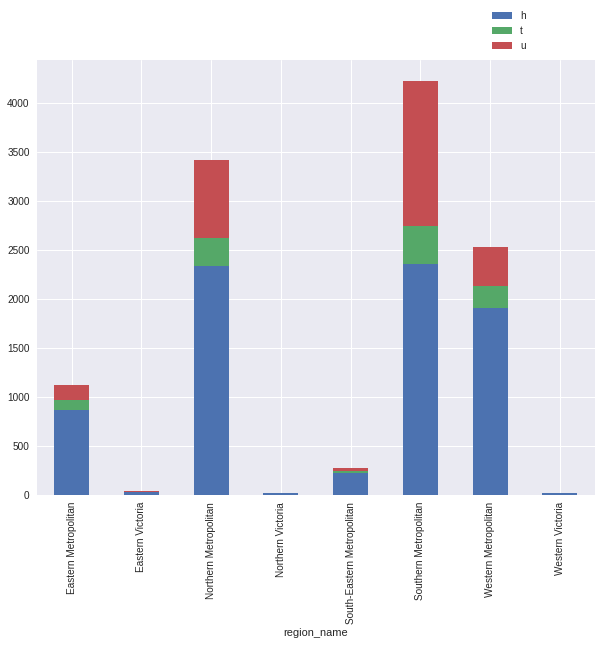

In [60]:
value_counts.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()